In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

import cv2
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from os import path
from utilities.patches import *
from estimators.inference import TraversabilityHeightmap
from jupyterthemes import jtplot
jtplot.reset()

plt.style.use(['science'])
matplotlib.rcParams['figure.figsize'] = (8,6)
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""


/home/francesco/.local/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


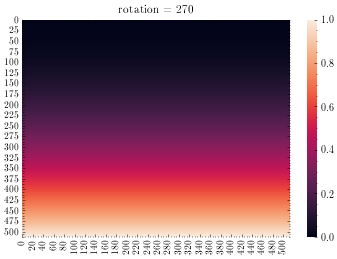

100%|██████████| 45369/45369 [00:00<00:00, 62185.16it/s]


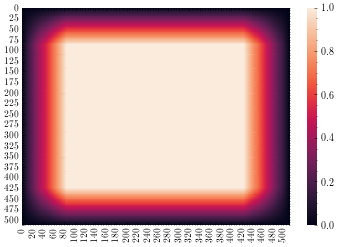

[INFO] saving render into /home/francesco/Documents/Master-Thesis/papers/Thesis/img/4/traversability/ramp-1/270.png


In [6]:
hm_path = './maps/new-train/bars1.png'

for rotation in [0, 90, 180, 270]:
    p = TraversabilityHeightmap.from_path(hm_path, 
                                          model_dir='/media/francesco/Carino/vaevictis/data/1558825182.753924',
                                          model_name='microresnet#3-gate=7x7-n=1-se=True',
                                          scale=1).add_traversability_probability(
        '/home/francesco/Documents/Master-Thesis/papers/Thesis/img/4/traversability/bars',
        step=2,
        patch_size=(78,78),
        rotation=rotation
    )
    p.plot3d_traversability(0.02, size=(500, 500), azimuth=45, elevation=45, distance=25)